<a href="https://colab.research.google.com/github/Pratham2012/Python-for-Finance/blob/main/Python_for_Finance_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
# We add .NS at the end as these companies are listed on the NSE(National Stock Exchange)
companies = ['RELIANCE.NS','TCS.NS','HDFCBANK.NS']

#Date range
start = '2018-01-01'
end = '2022-11-1'

data = yf.download(companies,start=start,end=end)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [ ]:
#pct_change() is a built-in method in DataFrame that computes the percent change from one row to another which is exactly what a return is
returns = data.pct_change()
returns = returns.dropna()

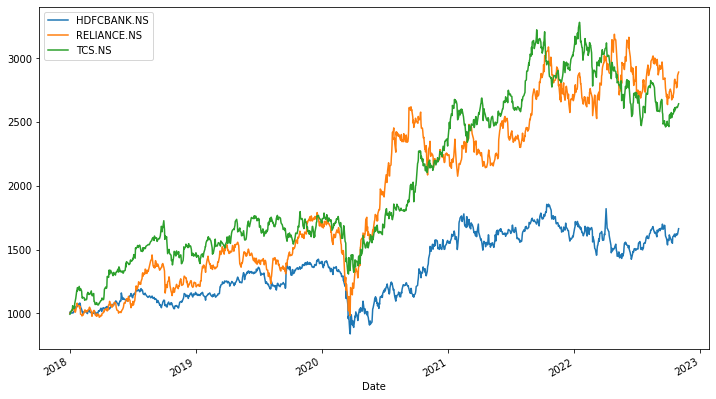

In [ ]:
wealth_index = 1000*(1+returns).cumprod()
wealth_index.plot(figsize=(12,7))

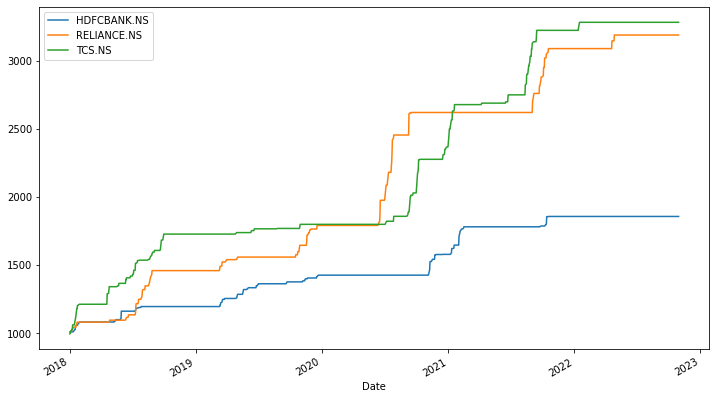

In [ ]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot(figsize=(12,7))

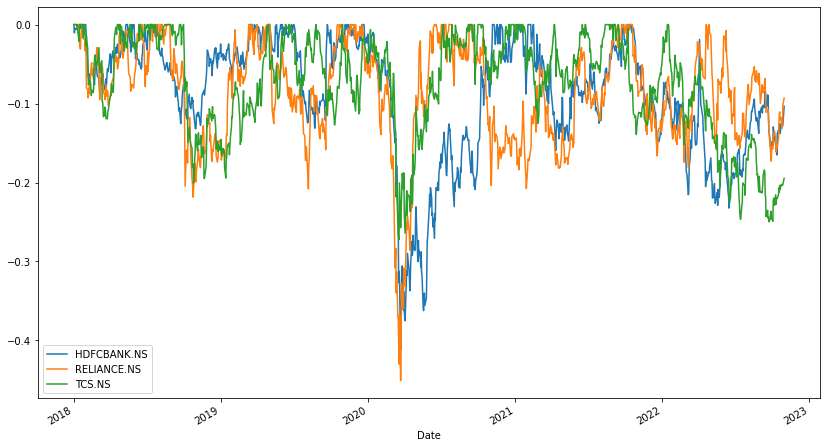

In [ ]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot(figsize=(14,8))

In [ ]:
import scipy.stats
scipy.stats.skew(returns)

array([ 0.05395364,  0.31852014, -0.02392524])

In [ ]:
scipy.stats.kurtosis(returns)

array([8.95024624, 8.07419595, 3.90632441])

In [ ]:
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series is normal or not
    Test is applied at the 1% level by default
    Returns True if the hypothesis of normality is accepted, False otherwise
    """
    statistic, p_value = scipy.stats.jarque_bera(r)
    return p_value > level

In [ ]:
returns.aggregate(is_normal)

HDFCBANK.NS    False
RELIANCE.NS    False
TCS.NS         False
dtype: bool